In [ ]:
! pip install weightwatcher  transformers 

## Makes plots for theory paper: The Trace Log Condition

### This is the simplest possible modern MLP, 3 layers trained on MNIST

**IMPORTANT**:
- First train the models. See WW_MLP3_Training_pytorch.ipynb or WW_MLP3_Training_keras.ipynb


In [ ]:
# If you are running this NB in google colab then execute this cell

from google.colab import drive
drive.mount('/drive')
results_dir = '/drive/MyDrive/setol_paper'

!ls $results_dir

In [3]:
from pathlib import Path
import os
os.chdir("../pytorch")

from models import MLP3
from trainer import Trainer
from weightwatcher import WeightWatcher

# If you are running this NB locally then set your results directory and execute this cell

results_dir = "../pytorch/saved_models/SETOL"
!ls $results_dir

MNIST  OLD_FASHION  OLD_MNIST  TEST


### Model Quality: The Trace Log Condition

SETOL theory posits that there is an Effective Correlation Space, (See notebook `WW_MLP3_Analysis_Effective_Correlation_Space.ipynb`), which is a low-rank subspace of each weight matrix. (The theory only considers weight matrices one at a time.) This Effective Correlation Space is delimited by an eigenvalue $\lambda_{min}$, such that the product of all eigenvalues above $\lambda_{min}$ is close to $1$. This ensures that the Jacobian Determinant of the mapping from this space onto the outputs has Unit determinant, and is therefore *volume preserving*.

Independently, HTSR theory posits that there is a different $\lambda_{min}^{HTSR}$ which is defined by the power law behavior of the eigenvalues above it. Collectively, the two theories predict that the two $\lambda_{min}$ parameters will converge to the same value when a model is well trained - that is, when it is close to the minimum Annealed Average error model.

In the Model Quality experiment (See `WW_MLP3_Analysis_Model_Quality.ipynb`,) we saw that as the hyper-parameter - either batch size or learning rate - accuracy increased, but when it passed a critical threshold, (batch size=$1$, or learning rate=$32\times$,) $\alpha$ fell below $2$, and train and test accuracy both suffered. To compare HTSR theory with SETOL, we can compare the two lambdas to see how they behave. The code below uses the WeightWatcher tool to plot the two lambdas in the FC1 layer.

Change the variable `search_param` to `"BS"` to see the effect of batch size. Change the variable `run` to `1, 2, 3,` or `4` to see other random seeds.

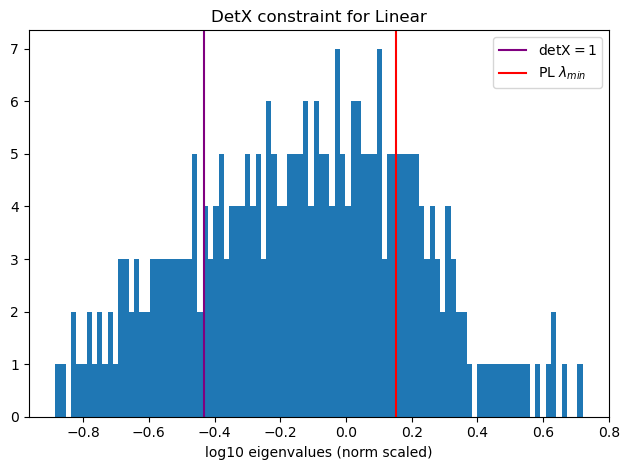

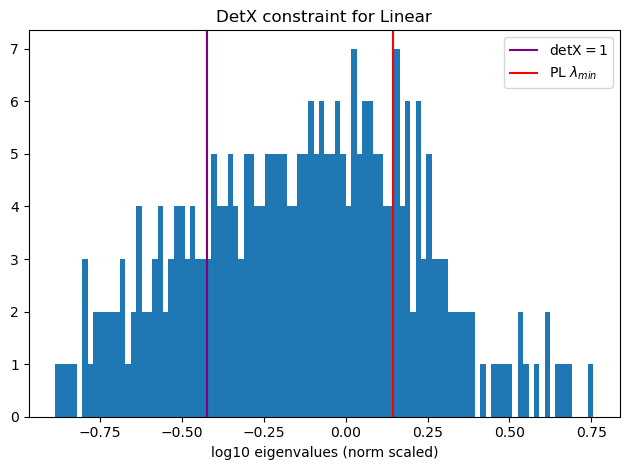

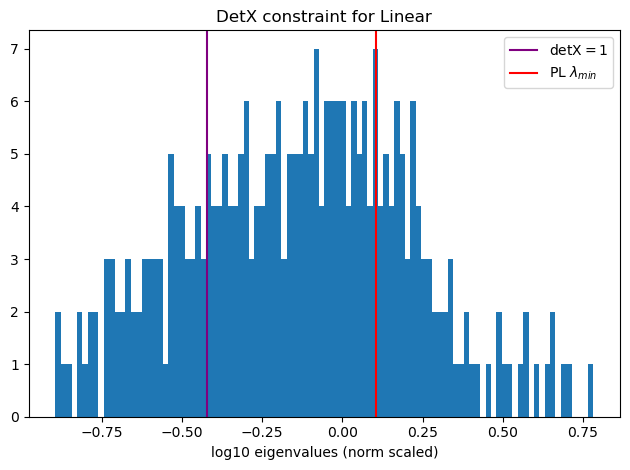

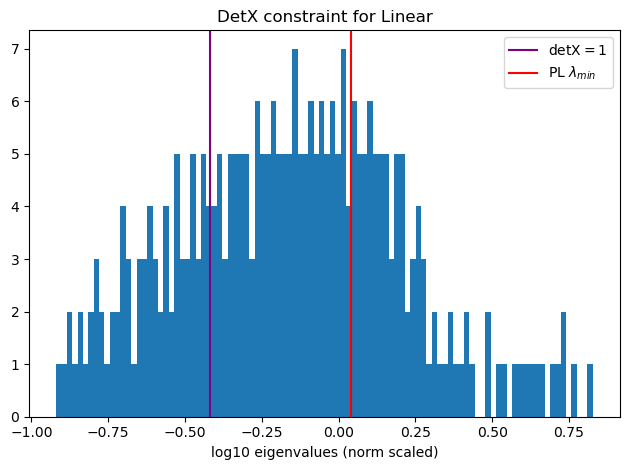

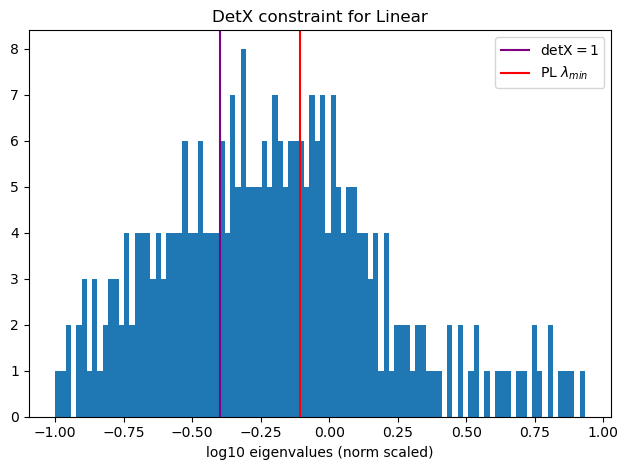

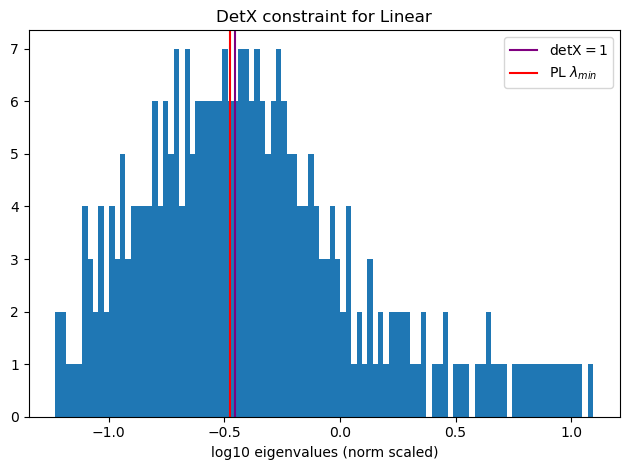

<Figure size 640x480 with 0 Axes>

In [13]:
from utils import last_epoch

m = MLP3()
t = Trainer(m)

search_param = "LR"
run=0


FC1 = 3
FC2 = 5

for scale in range(6):
  model_name = f"SETOL/MNIST/all/{search_param}_{2**scale}"

  E = last_epoch(run, model_name)
  t.load(run, E, model_name)
  watcher = WeightWatcher(m)
  save_dir = Path(f"figs/detX/{search_param}={2**scale}/FC1")
  save_dir.mkdir(parents=True, exist_ok=True)
  watcher.analyze(layers=[FC1], detX=True, plot=["detX"], savefig=str(save_dir))


### As accuracy improves, the two lambdas approach one another.
We also see that past the critical threshold where $\alpha < 2$, the power law $\lambda_{min}$ passes below the detX $\lambda_{min}$.

Next we will try plotting the two lambdas as a function of one another. In the WeightWatcher tool, the power law $\lambda_{min}$ is called `xmin`, and the detX $\lambda_{min}$ is called `detX_val_unrescaled`.

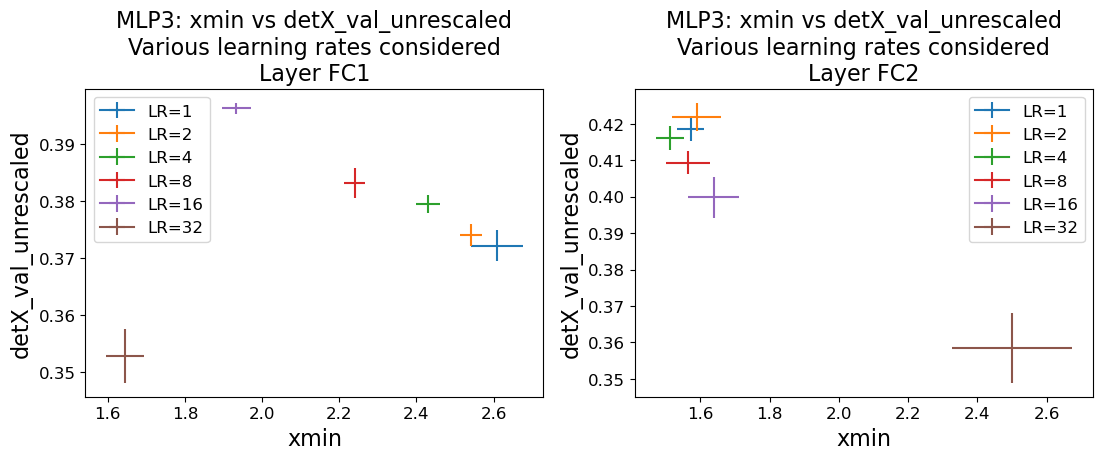

In [19]:
from importlib import reload
import plot_utils
reload(plot_utils)


from plot_utils import plot_ww_metrics_by_scales

m = MLP3()
t = Trainer(m)

search_param = "LR"

WW_metrics = ["xmin", "detX_val_unrescaled"]

plot_ww_metrics_by_scales("MNIST", "all", search_param, range(6), range(5), [0, 1], WW_metrics)  

### In FC1 the two lambdas maintain a linear relationship so long as $\alpha > 2$.

However, once $\alpha$ fell below $2$, the relationship is very different.